In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
n_points = int(1e6)
x_data = np.linspace(0.0, 10.0, n_points)
noise = np.random.randn(n_points)

In [3]:
y_label = (0.5 * x_data) + 5 + noise # noise will make it harder for the model

In [4]:
x_df = pd.DataFrame(data = x_data, columns=['xData'])
y_df = pd.DataFrame(data = y_label, columns=['yTarget'])
df = pd.concat([x_df, y_df], axis = 1)

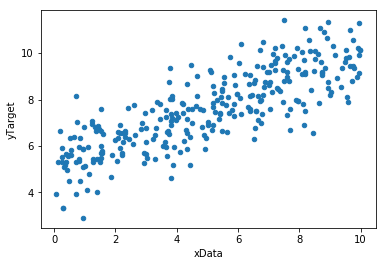

In [5]:
df.sample(n = 300).plot(kind='scatter', x = "xData", y = 'yTarget') #show a subset of the plot 

Feeding a neural network 1e6 points (each optimization run) is a lot to handle, that is why the concept of batches is introduced

In [6]:
batch_size = 10

In [7]:
two_random_variables = np.random.randn(2)
two_random_variables

array([ 2.3951051 ,  0.96472517])

In [8]:
m = tf.Variable(two_random_variables[0])
b = tf.Variable(two_random_variables[1])

In [9]:
xPh = tf.placeholder(tf.float64, [batch_size])
yPh = tf.placeholder(tf.float64, [batch_size])

In [10]:
y_pred = m*xPh + b

In [11]:
error = tf.reduce_sum(tf.square(yPh - y_pred)) 

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(error)

In [13]:
init = tf.global_variables_initializer()

In [14]:
with tf.Session() as sess:
    sess.run(init)
    nr_batches = 1000
    
    for i in range(nr_batches):
        rand_ind = np.random.randint(len(x_data), size = batch_size) # we want to pick the subset randomly (10 datapoints)
        feed = {xPh:x_data[rand_ind], yPh:y_label[rand_ind]}
        sess.run(train, feed_dict = feed)
    pred_m, pred_b = sess.run([m, b])

In [15]:
pred_m, pred_b # pretty close considering the random noise that was introduced

(0.49687202287166177, 4.9831735778907582)

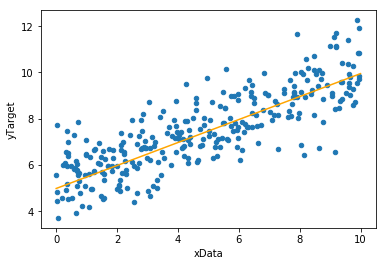

In [16]:
y_val = x_data * pred_m + pred_b
df.sample(300).plot(kind="scatter", x = "xData", y = "yTarget")
plt.plot(x_data, y_val, "orange")

#### TF Estimator

In [17]:
feat_columns = [tf.feature_column.numeric_column('x', shape = [1])]

In [18]:
estimator = tf.estimator.LinearRegressor(feature_columns = feat_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\s158881\\AppData\\Local\\Temp\\tmpmimmuzgy', '_tf_random_seed': 1, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100}


In [19]:
x_train, x_pred, y_train, y_pred = train_test_split(x_data, y_label, test_size = 0.3, random_state = 101)

In [20]:
# acts like a feed_dictionary and batch size function in one
input_function = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8, 
                                                   num_epochs = None, shuffle = True)

In [21]:
train_input_function = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8, 
                                                   num_epochs = 1000, shuffle = False)

In [22]:
eval_input_function = tf.estimator.inputs.numpy_input_fn({'x': x_train}, y_train, batch_size = 8, 
                                                   num_epochs = 1000, shuffle = False)

In [23]:
estimator.train(input_fn = input_function, steps = 1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\s158881\AppData\Local\Temp\tmpmimmuzgy\model.ckpt.
INFO:tensorflow:loss = 423.87, step = 1
INFO:tensorflow:global_step/sec: 1525.66
INFO:tensorflow:loss = 42.3588, step = 101 (0.067 sec)
INFO:tensorflow:global_step/sec: 1850.47
INFO:tensorflow:loss = 17.4471, step = 201 (0.054 sec)
INFO:tensorflow:global_step/sec: 1502.74
INFO:tensorflow:loss = 30.0505, step = 301 (0.066 sec)
INFO:tensorflow:global_step/sec: 2007.4
INFO:tensorflow:loss = 9.67163, step = 401 (0.050 sec)
INFO:tensorflow:global_step/sec: 1624.86
INFO:tensorflow:loss = 6.78068, step = 501 (0.063 sec)
INFO:tensorflow:global_step/sec: 1611.77
INFO:tensorflow:loss = 5.83272, step = 601 (0.062 sec)
INFO:tensorflow:global_step/sec: 1024.92
INFO:tensorflow:loss = 4.64116, step = 701 (0.097 sec)
INFO:tensorflow:global_step/sec: 1306.27
INFO:tensorflow:loss = 3.9071, step = 801 (0.077 sec)
INFO:tensorflow:global_step/sec: 1638.18
INF

In [24]:
train_metrics = estimator.evaluate(input_fn = train_input_function, steps = 1000)

INFO:tensorflow:Starting evaluation at 2017-11-21-21:19:56
INFO:tensorflow:Restoring parameters from C:\Users\s158881\AppData\Local\Temp\tmpmimmuzgy\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [647/1000]
INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [25]:
eval_metrics = estimator.evaluate(input_fn = eval_input_function, steps = 1000)

INFO:tensorflow:Starting evaluation at 2017-11-21-21:20:00
INFO:tensorflow:Restoring parameters from C:\Users\s158881\AppData\Local\Temp\tmpmimmuzgy\model.ckpt-1000
INFO:tensorflow:Evaluation [1/1000]
INFO:tensorflow:Evaluation [2/1000]
INFO:tensorflow:Evaluation [3/1000]
INFO:tensorflow:Evaluation [4/1000]
INFO:tensorflow:Evaluation [5/1000]
INFO:tensorflow:Evaluation [6/1000]
INFO:tensorflow:Evaluation [7/1000]
INFO:tensorflow:Evaluation [8/1000]
INFO:tensorflow:Evaluation [9/1000]
INFO:tensorflow:Evaluation [10/1000]
INFO:tensorflow:Evaluation [11/1000]
INFO:tensorflow:Evaluation [12/1000]
INFO:tensorflow:Evaluation [13/1000]
INFO:tensorflow:Evaluation [14/1000]
INFO:tensorflow:Evaluation [15/1000]
INFO:tensorflow:Evaluation [16/1000]
INFO:tensorflow:Evaluation [17/1000]
INFO:tensorflow:Evaluation [18/1000]
INFO:tensorflow:Evaluation [19/1000]
INFO:tensorflow:Evaluation [20/1000]
INFO:tensorflow:Evaluation [21/1000]
INFO:tensorflow:Evaluation [22/1000]
INFO:tensorflow:Evaluation [23

INFO:tensorflow:Evaluation [216/1000]
INFO:tensorflow:Evaluation [217/1000]
INFO:tensorflow:Evaluation [218/1000]
INFO:tensorflow:Evaluation [219/1000]
INFO:tensorflow:Evaluation [220/1000]
INFO:tensorflow:Evaluation [221/1000]
INFO:tensorflow:Evaluation [222/1000]
INFO:tensorflow:Evaluation [223/1000]
INFO:tensorflow:Evaluation [224/1000]
INFO:tensorflow:Evaluation [225/1000]
INFO:tensorflow:Evaluation [226/1000]
INFO:tensorflow:Evaluation [227/1000]
INFO:tensorflow:Evaluation [228/1000]
INFO:tensorflow:Evaluation [229/1000]
INFO:tensorflow:Evaluation [230/1000]
INFO:tensorflow:Evaluation [231/1000]
INFO:tensorflow:Evaluation [232/1000]
INFO:tensorflow:Evaluation [233/1000]
INFO:tensorflow:Evaluation [234/1000]
INFO:tensorflow:Evaluation [235/1000]
INFO:tensorflow:Evaluation [236/1000]
INFO:tensorflow:Evaluation [237/1000]
INFO:tensorflow:Evaluation [238/1000]
INFO:tensorflow:Evaluation [239/1000]
INFO:tensorflow:Evaluation [240/1000]
INFO:tensorflow:Evaluation [241/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [432/1000]
INFO:tensorflow:Evaluation [433/1000]
INFO:tensorflow:Evaluation [434/1000]
INFO:tensorflow:Evaluation [435/1000]
INFO:tensorflow:Evaluation [436/1000]
INFO:tensorflow:Evaluation [437/1000]
INFO:tensorflow:Evaluation [438/1000]
INFO:tensorflow:Evaluation [439/1000]
INFO:tensorflow:Evaluation [440/1000]
INFO:tensorflow:Evaluation [441/1000]
INFO:tensorflow:Evaluation [442/1000]
INFO:tensorflow:Evaluation [443/1000]
INFO:tensorflow:Evaluation [444/1000]
INFO:tensorflow:Evaluation [445/1000]
INFO:tensorflow:Evaluation [446/1000]
INFO:tensorflow:Evaluation [447/1000]
INFO:tensorflow:Evaluation [448/1000]
INFO:tensorflow:Evaluation [449/1000]
INFO:tensorflow:Evaluation [450/1000]
INFO:tensorflow:Evaluation [451/1000]
INFO:tensorflow:Evaluation [452/1000]
INFO:tensorflow:Evaluation [453/1000]
INFO:tensorflow:Evaluation [454/1000]
INFO:tensorflow:Evaluation [455/1000]
INFO:tensorflow:Evaluation [456/1000]
INFO:tensorflow:Evaluation [457/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [648/1000]
INFO:tensorflow:Evaluation [649/1000]
INFO:tensorflow:Evaluation [650/1000]
INFO:tensorflow:Evaluation [651/1000]
INFO:tensorflow:Evaluation [652/1000]
INFO:tensorflow:Evaluation [653/1000]
INFO:tensorflow:Evaluation [654/1000]
INFO:tensorflow:Evaluation [655/1000]
INFO:tensorflow:Evaluation [656/1000]
INFO:tensorflow:Evaluation [657/1000]
INFO:tensorflow:Evaluation [658/1000]
INFO:tensorflow:Evaluation [659/1000]
INFO:tensorflow:Evaluation [660/1000]
INFO:tensorflow:Evaluation [661/1000]
INFO:tensorflow:Evaluation [662/1000]
INFO:tensorflow:Evaluation [663/1000]
INFO:tensorflow:Evaluation [664/1000]
INFO:tensorflow:Evaluation [665/1000]
INFO:tensorflow:Evaluation [666/1000]
INFO:tensorflow:Evaluation [667/1000]
INFO:tensorflow:Evaluation [668/1000]
INFO:tensorflow:Evaluation [669/1000]
INFO:tensorflow:Evaluation [670/1000]
INFO:tensorflow:Evaluation [671/1000]
INFO:tensorflow:Evaluation [672/1000]
INFO:tensorflow:Evaluation [673/1000]
INFO:tensorf

INFO:tensorflow:Evaluation [863/1000]
INFO:tensorflow:Evaluation [864/1000]
INFO:tensorflow:Evaluation [865/1000]
INFO:tensorflow:Evaluation [866/1000]
INFO:tensorflow:Evaluation [867/1000]
INFO:tensorflow:Evaluation [868/1000]
INFO:tensorflow:Evaluation [869/1000]
INFO:tensorflow:Evaluation [870/1000]
INFO:tensorflow:Evaluation [871/1000]
INFO:tensorflow:Evaluation [872/1000]
INFO:tensorflow:Evaluation [873/1000]
INFO:tensorflow:Evaluation [874/1000]
INFO:tensorflow:Evaluation [875/1000]
INFO:tensorflow:Evaluation [876/1000]
INFO:tensorflow:Evaluation [877/1000]
INFO:tensorflow:Evaluation [878/1000]
INFO:tensorflow:Evaluation [879/1000]
INFO:tensorflow:Evaluation [880/1000]
INFO:tensorflow:Evaluation [881/1000]
INFO:tensorflow:Evaluation [882/1000]
INFO:tensorflow:Evaluation [883/1000]
INFO:tensorflow:Evaluation [884/1000]
INFO:tensorflow:Evaluation [885/1000]
INFO:tensorflow:Evaluation [886/1000]
INFO:tensorflow:Evaluation [887/1000]
INFO:tensorflow:Evaluation [888/1000]
INFO:tensorf

In [26]:
print('training data metric ', train_metrics)
print('test data metric ', eval_metrics)

training data metric  {'average_loss': 1.0582374, 'loss': 8.4658995, 'global_step': 1000}
test data metric  {'average_loss': 1.0582374, 'loss': 8.4658995, 'global_step': 1000}


Predicting values

In [27]:
need_to_predict = np.linspace(0, 10, 10)
input_function_predict = tf.estimator.inputs.numpy_input_fn({'x':need_to_predict}, shuffle = False)

In [31]:
preds = estimator.predict(input_fn = input_function_predict)
list(preds)

INFO:tensorflow:Restoring parameters from C:\Users\s158881\AppData\Local\Temp\tmpmimmuzgy\model.ckpt-1000


[{'predictions': array([ 4.4295125], dtype=float32)},
 {'predictions': array([ 5.07451057], dtype=float32)},
 {'predictions': array([ 5.71950817], dtype=float32)},
 {'predictions': array([ 6.36450624], dtype=float32)},
 {'predictions': array([ 7.00950432], dtype=float32)},
 {'predictions': array([ 7.65450191], dtype=float32)},
 {'predictions': array([ 8.29949951], dtype=float32)},
 {'predictions': array([ 8.94449806], dtype=float32)},
 {'predictions': array([ 9.58949566], dtype=float32)},
 {'predictions': array([ 10.23449326], dtype=float32)}]

In [35]:
pred_results = []
for pred in estimator.predict(input_fn = input_function_predict):
    pred_results.append(pred['predictions'])

INFO:tensorflow:Restoring parameters from C:\Users\s158881\AppData\Local\Temp\tmpmimmuzgy\model.ckpt-1000


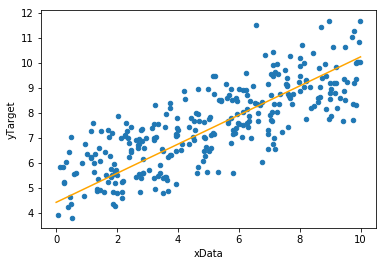

In [37]:
df.sample(n = 300).plot(kind = 'scatter', x = 'xData', y = 'yTarget')
plt.plot(need_to_predict, pred_results, 'orange')